In [28]:
import functions
from functions import *
import matplotlib.pyplot as plt

# Dimensions from 1 to 3 (higher possible)
D = 1
# Number of lattice points  100
N = 100
L_over_r = 3

epsilon = L_over_r/N
mu = 10
epsilon_2 = epsilon**2
functions.N = N
functions.D = D
functions.mu = mu
functions.epsilon_2 = epsilon_2

# Initialize plane wave with according dimensions
psi = generate_plane_wave((8,)*D)

df = time_evolution(psi, integrator_euler, 0.01, 0.15)
df.head()


,norm,exp_Etot,exp_Ekin,exp_Epot,exp_pos,indet_pos,time,function
0,102.071596,1468.351567,1402.845478,65.506088,[[5052.347864129766]],[[-25191098.347244196]],0.00,"[(1.000000000000001-0.1569682721734848j), (0.9..."
0,104.186357,1498.850841,1431.924995,66.925846,[[5156.703335621959]],[[-26249572.150765523]],0.01,"[(0.9727465104094097-0.31393654434697243j), (1..."
0,106.345225,1529.996429,1461.630007,68.366422,[[5263.509068063584]],[[-27355446.32229529]],0.02,"[(0.9182395312282222-0.4624165326349424j), (1...."
0,108.549269,1561.827871,1492.000070,69.827801,[[5372.974400207053]],[[-28512521.47654314]],0.03,"[(0.844657901173546-0.5939199531518684j), (1.0..."
0,110.800086,1594.488600,1523.172859,71.315741,[[5484.134639819566]],[[-29712059.12157665]],0.04,"[(0.7683592976796132-0.7136705102067562j), (0...."


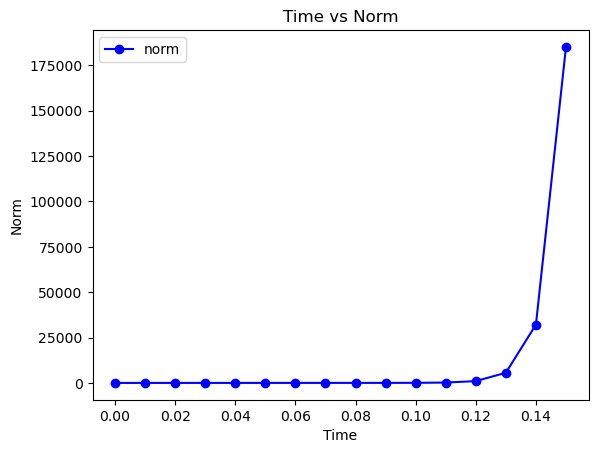

In [29]:
df.plot(x='time', y='norm', kind='line', marker='o', linestyle='-', color='b')

# Set plot labels and title
plt.xlabel('Time')
plt.ylabel('Norm')
plt.title('Time vs Norm')

# Display the plot
plt.show()

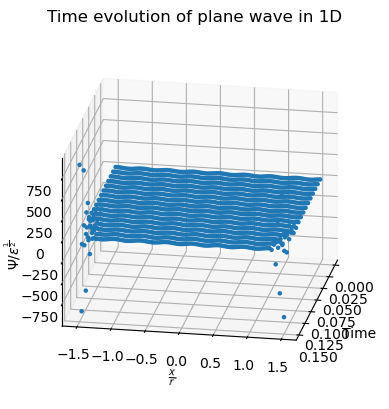

In [30]:
from mpl_toolkits.mplot3d import Axes3D
length = len(df)
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_axis = np.linspace(-N/2,N/2,N)
x_axis= x_axis*epsilon


# Scatter plot
ax.view_init(elev=20, azim=10)
ax.set_proj_type('ortho')
for index, row in df.iterrows():
    time = row['time']
    function = row['function']
    ax.scatter(time, x_axis, function.real/epsilon**(0.5), marker = '.',color = 'C0', alpha = 1)

# Set plot labels and title
ax.set_xlabel('Time')
ax.set_ylabel(r"$\frac{x}{r}$")
ax.set_zlabel(r"$\Psi/ \varepsilon^{\frac{1}{2}}$")
ax.set_title('Time evolution of plane wave in 1D')

# Display the plot
plt.show()
